In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [11]:
main_data_df = pd.read_csv('lcbo_wines.csv')

In [12]:
main_data_df.head()

,Name,Regular Price,Sale Price,Rating,Reviews,Size,Description,Category,Alcohol/Vol,Made In,By,Sugar Content,Varietal,Release Date,Lat,Lon
0,Ruffino Prosecco Rose DOC,20.00,18.00,5.0,(2),750 ml bottle,Ruffino has been at the forefront of Italian w...,Rosé & Red Sparkling Wine,11%,"Friuli, Italy",Ruffino Srl Wines,21 g/L,Sparkling,NaN,45.441300,11.596660
1,Josh Cellars Pinot Grigio,19.95,17.95,4.5,(17),750 ml bottle,Josh Cellars is a renowned brand created to ce...,White Wine,12.5%,"California, United States",Josh Cellars,3 g/L,Pinot Grigio,NaN,36.701463,-118.755997
2,Collavini Pinot Grigio,16.55,14.55,4.5,(6),750 ml bottle,"This pinot grigio is a customer favourite, and...",White Wine,12.5%,"Veneto, Italy",Collavini,4 g/L,Pinot Grigio,NaN,45.647666,11.866525
3,19 Crimes Snoop Dogg Cali Red,19.95,17.95,3.7,(63),750 ml bottle,"19 Crimes wines are defiant by nature, bold an...",Red Wine,14.1%,"California, United States",19 Crimes,21 g/L,Red Blend,NaN,36.701463,-118.755997
4,Peller Family Vineyards Pinot Grigio,10.95,9.95,5.0,(3),750 ml bottle,"Easy drinking, refreshing white wine, sourced ...",White Wine,12%,Canada,Peller Family Vineyards,6 g/L,Pinot Grigio,NaN,61.066692,-107.991707


In [13]:
main_data_df.dtypes


Name              object
Regular Price    float64
Sale Price       float64
Rating           float64
Reviews           object
Size              object
Description       object
Category          object
Alcohol/Vol       object
Made In           object
By                object
Sugar Content     object
Varietal          object
Release Date      object
Lat              float64
Lon              float64
dtype: object

In [14]:
main_data_df['Sugar Content (g/L)'] = main_data_df['Sugar Content'].str.replace('g/L', '')
main_data_df['Alcohol/Vol'] = main_data_df['Alcohol/Vol'].str.replace('%', '')
main_data_df = main_data_df.fillna(0)
main_data_df = main_data_df.drop(['Sugar Content'], axis = 1)

In [15]:
main_data_df['Sugar Content (g/L)'] = main_data_df['Sugar Content (g/L)'].astype(float)
main_data_df['Alcohol/Vol'] = main_data_df['Alcohol/Vol'].astype(float)
main_data_df['Regular Price'] = main_data_df['Regular Price'].astype(float)
main_data_df['Sale Price'] = main_data_df['Sale Price'].astype(float)

In [16]:
main_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 167 non-null    object 
 1   Regular Price        167 non-null    float64
 2   Sale Price           167 non-null    float64
 3   Rating               167 non-null    float64
 4   Reviews              167 non-null    object 
 5   Size                 167 non-null    object 
 6   Description          167 non-null    object 
 7   Category             167 non-null    object 
 8   Alcohol/Vol          167 non-null    float64
 9   Made In              167 non-null    object 
 10  By                   167 non-null    object 
 11  Varietal             167 non-null    object 
 12  Release Date         167 non-null    object 
 13  Lat                  167 non-null    float64
 14  Lon                  167 non-null    float64
 15  Sugar Content (g/L)  167 non-null    flo

In [17]:
main_data_df.head()

,Name,Regular Price,Sale Price,Rating,Reviews,Size,Description,Category,Alcohol/Vol,Made In,By,Varietal,Release Date,Lat,Lon,Sugar Content (g/L)
0,Ruffino Prosecco Rose DOC,20.00,18.00,5.0,(2),750 ml bottle,Ruffino has been at the forefront of Italian w...,Rosé & Red Sparkling Wine,11.0,"Friuli, Italy",Ruffino Srl Wines,Sparkling,0,45.441300,11.596660,21.0
1,Josh Cellars Pinot Grigio,19.95,17.95,4.5,(17),750 ml bottle,Josh Cellars is a renowned brand created to ce...,White Wine,12.5,"California, United States",Josh Cellars,Pinot Grigio,0,36.701463,-118.755997,3.0
2,Collavini Pinot Grigio,16.55,14.55,4.5,(6),750 ml bottle,"This pinot grigio is a customer favourite, and...",White Wine,12.5,"Veneto, Italy",Collavini,Pinot Grigio,0,45.647666,11.866525,4.0
3,19 Crimes Snoop Dogg Cali Red,19.95,17.95,3.7,(63),750 ml bottle,"19 Crimes wines are defiant by nature, bold an...",Red Wine,14.1,"California, United States",19 Crimes,Red Blend,0,36.701463,-118.755997,21.0
4,Peller Family Vineyards Pinot Grigio,10.95,9.95,5.0,(3),750 ml bottle,"Easy drinking, refreshing white wine, sourced ...",White Wine,12.0,Canada,Peller Family Vineyards,Pinot Grigio,0,61.066692,-107.991707,6.0


In [30]:
main_data_df['Category'].value_counts()


12.50    29
13.00    25
12.00    22
13.50    22
14.00    14
14.50    12
11.50    10
11.00     4
10.50     3
13.10     2
12.80     2
9.00      2
6.50      1
13.20     1
20.00     1
12.20     1
0.01      1
12.70     1
6.80      1
14.20     1
11.10     1
14.80     1
12.10     1
8.00      1
15.00     1
10.00     1
11.60     1
5.50      1
7.50      1
9.50      1
14.10     1
13.60     1
Name: Alcohol/Vol, dtype: int64

In [26]:
category_dummies=pd.get_dummies(main_data_df['Category'])
category_dummies

,Flavoured Wine\t,Port,Red Wine,Rose Wine,Rosé & Red Sparkling Wine,White Champagne,White Sparkling Wine,White Wine
0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
162,0,0,0,0,0,0,0,1
163,0,0,0,0,0,0,0,1
164,0,0,1,0,0,0,0,0
165,0,0,1,0,0,0,0,0


In [27]:
main_data_df=pd.concat([main_data_df, category_dummies], axis=1)
main_data_df

,Name,Regular Price,Sale Price,Rating,Reviews,Size,Description,Category,Alcohol/Vol,Made In,...,Lon,Sugar Content (g/L),Flavoured Wine\t,Port,Red Wine,Rose Wine,Rosé & Red Sparkling Wine,White Champagne,White Sparkling Wine,White Wine
0,Ruffino Prosecco Rose DOC,20.00,18.00,5.0,(2),750 ml bottle,Ruffino has been at the forefront of Italian w...,Rosé & Red Sparkling Wine,11.0,"Friuli, Italy",...,11.596660,21.0,0,0,0,0,1,0,0,0
1,Josh Cellars Pinot Grigio,19.95,17.95,4.5,(17),750 ml bottle,Josh Cellars is a renowned brand created to ce...,White Wine,12.5,"California, United States",...,-118.755997,3.0,0,0,0,0,0,0,0,1
2,Collavini Pinot Grigio,16.55,14.55,4.5,(6),750 ml bottle,"This pinot grigio is a customer favourite, and...",White Wine,12.5,"Veneto, Italy",...,11.866525,4.0,0,0,0,0,0,0,0,1
3,19 Crimes Snoop Dogg Cali Red,19.95,17.95,3.7,(63),750 ml bottle,"19 Crimes wines are defiant by nature, bold an...",Red Wine,14.1,"California, United States",...,-118.755997,21.0,0,0,1,0,0,0,0,0
4,Peller Family Vineyards Pinot Grigio,10.95,9.95,5.0,(3),750 ml bottle,"Easy drinking, refreshing white wine, sourced ...",White Wine,12.0,Canada,...,-107.991707,6.0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Chamisal Santa Rita Hills Chardonnay 2016,39.95,35.95,4.0,(1),750 ml bottle,"A brilliant wine, the 2016 Chardonnay Sta Rita...",White Wine,14.2,"California, United States",...,-118.755997,2.0,0,0,0,0,0,0,0,1
163,McManis Chardonnay 2021,20.95,18.95,4.0,(5),750 ml bottle,McManis has been family-owned for five generat...,White Wine,13.5,"California, United States",...,-118.755997,6.0,0,0,0,0,0,0,0,1
164,689 Cellars Submission Red 2020,20.95,18.95,4.0,(2),750 ml bottle,"Big, ripe, and easy-to-love, this red blend co...",Red Wine,14.5,"California, United States",...,-118.755997,9.0,0,0,1,0,0,0,0,0
165,Altanza Gran Reserva 2015,30.95,28.95,5.0,(1),750 ml bottle,100% Tempranillo. Beautiful and deep Gran Rese...,Red Wine,13.5,"Rioja, Spain",...,-2.462699,2.0,0,0,1,0,0,0,0,0


In [28]:
main_data_df = main_data_df.drop(columns=['Category'])
main_data_df

,Name,Regular Price,Sale Price,Rating,Reviews,Size,Description,Alcohol/Vol,Made In,By,...,Lon,Sugar Content (g/L),Flavoured Wine\t,Port,Red Wine,Rose Wine,Rosé & Red Sparkling Wine,White Champagne,White Sparkling Wine,White Wine
0,Ruffino Prosecco Rose DOC,20.00,18.00,5.0,(2),750 ml bottle,Ruffino has been at the forefront of Italian w...,11.0,"Friuli, Italy",Ruffino Srl Wines,...,11.596660,21.0,0,0,0,0,1,0,0,0
1,Josh Cellars Pinot Grigio,19.95,17.95,4.5,(17),750 ml bottle,Josh Cellars is a renowned brand created to ce...,12.5,"California, United States",Josh Cellars,...,-118.755997,3.0,0,0,0,0,0,0,0,1
2,Collavini Pinot Grigio,16.55,14.55,4.5,(6),750 ml bottle,"This pinot grigio is a customer favourite, and...",12.5,"Veneto, Italy",Collavini,...,11.866525,4.0,0,0,0,0,0,0,0,1
3,19 Crimes Snoop Dogg Cali Red,19.95,17.95,3.7,(63),750 ml bottle,"19 Crimes wines are defiant by nature, bold an...",14.1,"California, United States",19 Crimes,...,-118.755997,21.0,0,0,1,0,0,0,0,0
4,Peller Family Vineyards Pinot Grigio,10.95,9.95,5.0,(3),750 ml bottle,"Easy drinking, refreshing white wine, sourced ...",12.0,Canada,Peller Family Vineyards,...,-107.991707,6.0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Chamisal Santa Rita Hills Chardonnay 2016,39.95,35.95,4.0,(1),750 ml bottle,"A brilliant wine, the 2016 Chardonnay Sta Rita...",14.2,"California, United States",Chamisal,...,-118.755997,2.0,0,0,0,0,0,0,0,1
163,McManis Chardonnay 2021,20.95,18.95,4.0,(5),750 ml bottle,McManis has been family-owned for five generat...,13.5,"California, United States",McManis,...,-118.755997,6.0,0,0,0,0,0,0,0,1
164,689 Cellars Submission Red 2020,20.95,18.95,4.0,(2),750 ml bottle,"Big, ripe, and easy-to-love, this red blend co...",14.5,"California, United States",Vintages Front Line Release,...,-118.755997,9.0,0,0,1,0,0,0,0,0
165,Altanza Gran Reserva 2015,30.95,28.95,5.0,(1),750 ml bottle,100% Tempranillo. Beautiful and deep Gran Rese...,13.5,"Rioja, Spain",Vintages Front Line Release,...,-2.462699,2.0,0,0,1,0,0,0,0,0


In [32]:
main_scaled_df = StandardScaler().fit_transform(main_data_df[['Regular Price', 'Sale Price', 'Alcohol/Vol', 'Sugar Content (g/L)','Flavoured Wine\t','Port','Red Wine','Rose Wine','Rosé & Red Sparkling Wine','White Champagne','White Sparkling Wine','White Wine']])

In [33]:
scaled_df = pd.DataFrame(main_scaled_df, columns = ['Regular Price', 'Sale Price', 'Alcohol/Vol', 'Sugar Content (g/L)','Flavoured Wine\t','Port','Red Wine','Rose Wine','Rosé & Red Sparkling Wine','White Champagne','White Sparkling Wine','White Wine'])
scaled_df
scaled_df.sample(30)


,Regular Price,Sale Price,Alcohol/Vol,Sugar Content (g/L),Flavoured Wine\t,Port,Red Wine,Rose Wine,Rosé & Red Sparkling Wine,White Champagne,White Sparkling Wine,White Wine
94,-0.469679,-0.369050,-0.567266,-0.504404,-0.135250,-0.077615,-0.849500,-0.278243,-0.135250,-0.077615,-0.193047,1.162804
11,0.555130,0.599977,0.504925,-0.216124,-0.135250,-0.077615,1.177164,-0.278243,-0.135250,-0.077615,-0.193047,-0.859990
44,-0.268271,-0.407051,0.504925,-0.504404,-0.135250,-0.077615,-0.849500,-0.278243,-0.135250,-0.077615,-0.193047,1.162804
6,-0.505222,-0.470386,-0.567266,0.129812,-0.135250,-0.077615,-0.849500,-0.278243,7.393691,-0.077615,-0.193047,-0.859990
57,0.318180,0.346636,-0.299218,-0.158468,-0.135250,-0.077615,-0.849500,-0.278243,-0.135250,-0.077615,-0.193047,1.162804
28,-0.262348,-0.274048,0.772972,-0.216124,-0.135250,-0.077615,1.177164,-0.278243,-0.135250,-0.077615,-0.193047,-0.859990
18,0.318180,0.346636,-0.031171,-0.504404,-0.135250,-0.077615,-0.849500,-0.278243,-0.135250,-0.077615,-0.193047,1.162804
12,-0.522993,-0.552722,-0.031171,-0.504404,-0.135250,-0.077615,-0.849500,3.593976,-0.135250,-0.077615,-0.193047,-0.859990
100,2.930555,2.886375,-0.299218,0.014500,-0.135250,-0.077615,-0.849500,-0.278243,-0.135250,12.884099,-0.193047,-0.859990
147,0.081230,0.093296,-0.031171,-0.389092,-0.135250,-0.077615,-0.849500,-0.278243,-0.135250,-0.077615,-0.193047,1.162804


In [41]:
inertia=[]
k=list(range(1, 15))
for i in k:
    category_model=KMeans(n_clusters=i, random_state=0)
    category_model.fit(main_scaled_df)
    inertia.append(category_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [42]:
elbow_data = {"k":k,"inertia":inertia}
df_elbow=pd.DataFrame(elbow_data)

In [43]:
df_elbow

,k,inertia
0,1,2004.000000
1,2,1660.578139
2,3,1421.895983
3,4,1205.248313
4,5,1005.808893
5,6,840.604641
6,7,640.694166
7,8,472.135479
8,9,313.155605
9,10,218.726319


<Axes: xlabel='k'>

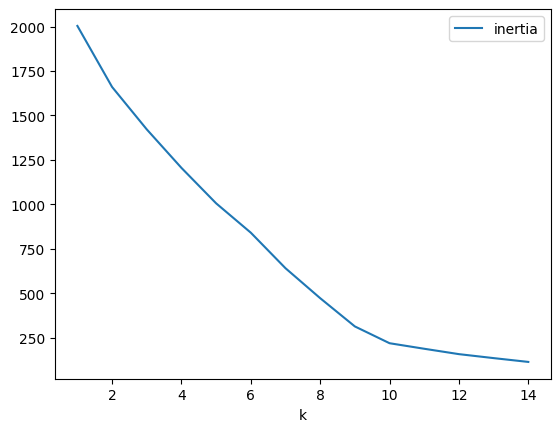

In [44]:
df_elbow.plot('k','inertia')

In [ ]:
#10 Clusters

In [45]:
model = KMeans(n_clusters=10,random_state=0)

In [49]:
model.fit(main_scaled_df)
md = model.predict(main_scaled_df)
md

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([6, 0, 0, 2, 0, 0, 6, 7, 0, 2, 2, 2, 3, 0, 0, 3, 0, 2, 0, 0, 0, 0,
       0, 2, 7, 2, 2, 2, 2, 2, 3, 8, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 8,
       0, 0, 2, 0, 2, 3, 2, 0, 2, 6, 2, 2, 2, 0, 2, 0, 3, 0, 7, 2, 2, 3,
       0, 0, 0, 0, 3, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2, 2, 0, 3, 2, 2, 0,
       2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 9, 0, 4, 0, 5, 0, 7, 0, 2, 0,
       0, 2, 0, 1, 2, 1, 2, 0, 0, 1, 2, 0, 0, 3, 3, 2, 2, 0, 2, 2, 2, 1,
       1, 2, 0, 1, 2, 0, 5, 3, 2, 0, 5, 0, 1, 2, 8, 0, 2, 2, 0, 3, 2, 2,
       7, 2, 2, 2, 0, 1, 0, 1, 1, 0, 2, 1, 2], dtype=int32)